<a href="https://colab.research.google.com/github/Mehedihasan097/Econometrics/blob/main/Portfolio_Analysis_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt



<ipython-input-38-3d16cd8556da>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_appended = df_appended.append(df)
<ipython-input-38-3d16cd8556da>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_appended = df_appended.append(df)
<ipython-input-38-3d16cd8556da>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_appended = df_appended.append(df)


In [ ]:
crypto_list = ["BNB-USD", "BTC-USD","ETH-USD"]
# Initialize an empty DataFrame to store combined data
df_appended = pd.DataFrame()

for crypto in crypto_list:
    crypto_df = yf.Ticker(crypto)
    df = crypto_df.history(period="2y")
    df["returns"] = df["Close"].pct_change()
    df["crypto"] = crypto
    df_appended = df_appended.append(df)

In [ ]:
summary = df_appended.groupby(['crypto'], as_index=False).agg(Mean = pd.NamedAgg(column='returns',aggfunc="mean" ),
                                                               Standard_Deviation = pd.NamedAgg(column='returns',aggfunc="std"),
                                                               skew = pd.NamedAgg(column='returns', aggfunc="skew"),
                                                               kurt =  pd.NamedAgg(column='returns', aggfunc=pd.DataFrame.kurt))

In [ ]:
trading_days = 365
summary['% Return'] = round(summary['Mean']*trading_days,2)
summary['Risk'] = round(summary["Standard_Deviation"]*np.sqrt(trading_days),2)
summary

,crypto,Mean,Standard_Deviation,skew,kurt,% Return,Risk
0,BNB-USD,0.000188,0.030141,-0.564663,5.791820,0.07,0.58
1,BTC-USD,0.000638,0.028339,-0.152688,4.952004,0.23,0.54
2,ETH-USD,0.000518,0.035557,-0.018107,4.630448,0.19,0.68


In [ ]:
close_price = pd.pivot_table(df_appended, index = ['Date'], columns=['crypto'], values = ['returns'], aggfunc=np.sum)

In [ ]:
corr_matrix = close_price.corr()

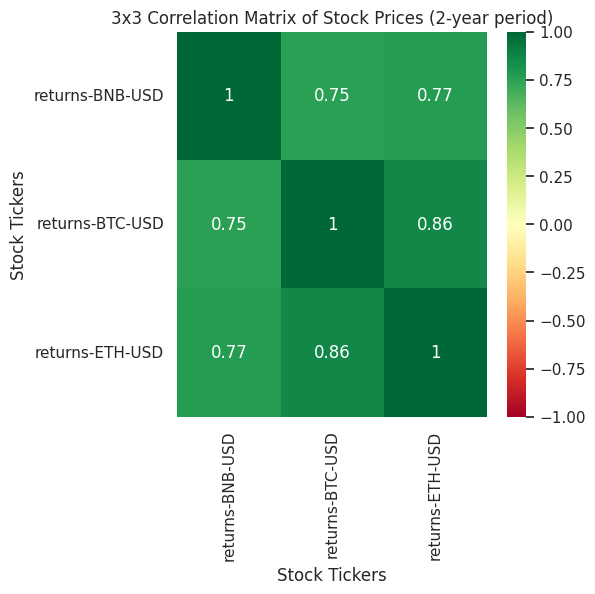

In [ ]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('3x3 Correlation Matrix of Stock Prices (2-year period)')

# display the plot
plt.show()

In [ ]:
cov_matrix = close_price.cov()

In [ ]:
cov_matrix

returns                    
crypto            BNB-USD   BTC-USD   ETH-USD
        crypto                               
returns BNB-USD  0.000907  0.000640  0.000821
        BTC-USD  0.000640  0.000802  0.000869
        ETH-USD  0.000821  0.000869  0.001263

In [ ]:
weights = [0.3, 0.3,0.4]
close_price['portfolio_return'] = (close_price.returns*weights).sum(axis=1)
close_price

returns                     portfolio_return
crypto                      BNB-USD   BTC-USD   ETH-USD                 
Date                                                                    
2022-02-13 00:00:00+00:00  0.000000  0.000000  0.000000         0.000000
2022-02-14 00:00:00+00:00  0.011968  0.009228  0.017346         0.013297
2022-02-15 00:00:00+00:00  0.071220  0.046688  0.083995         0.068970
2022-02-16 00:00:00+00:00 -0.010387 -0.013760 -0.016368        -0.013791
2022-02-17 00:00:00+00:00 -0.059516 -0.077882 -0.078760        -0.072724
...                             ...       ...       ...              ...
2024-02-09 00:00:00+00:00  0.015587  0.040741  0.027939         0.028074
2024-02-10 00:00:00+00:00 -0.002187  0.013237  0.005513         0.005520
2024-02-11 00:00:00+00:00 -0.007261  0.010940  0.002536         0.002118
2024-02-12 00:00:00+00:00  0.022311  0.034462  0.060036         0.041046
2024-02-13 00:00:00+00:00 -0.002854  0.002494 -0.003055        -0.001330

[731 rows x 4 columns]

<Axes: xlabel='Date'>

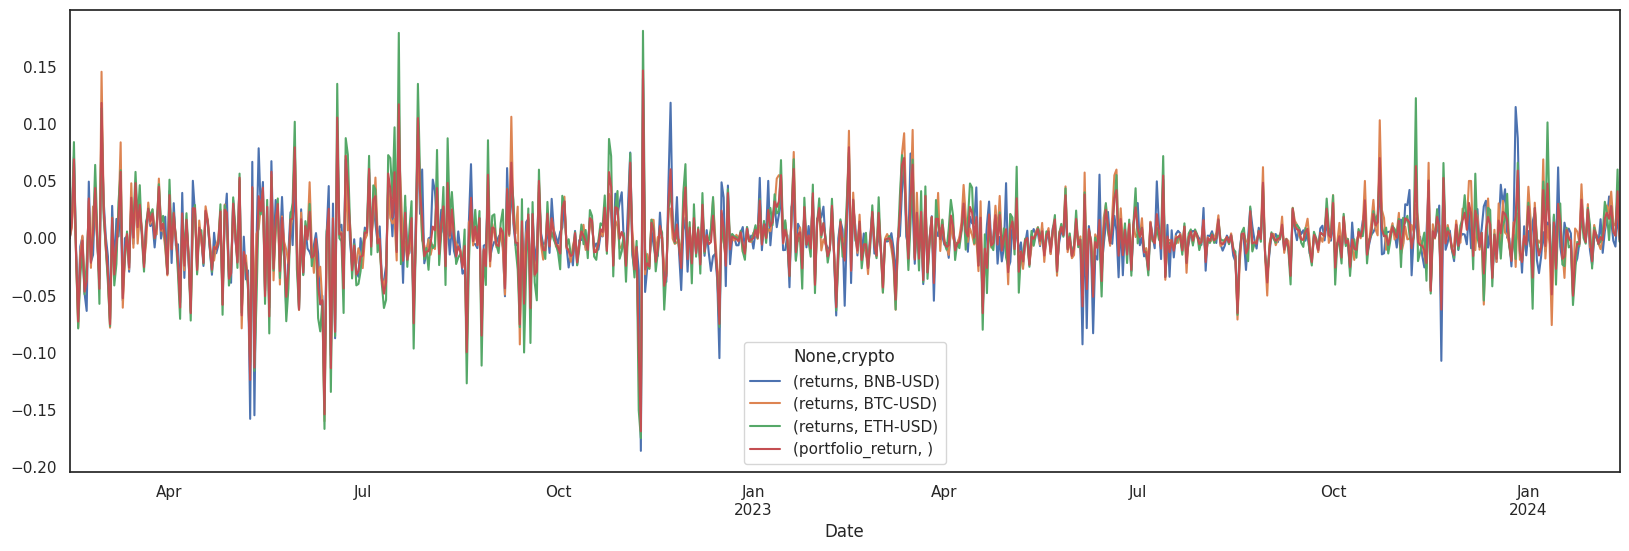

In [ ]:
close_price.plot(figsize=(20,6))

,crypto,Mean,Standard_Deviation,skew,kurt,% Return,Risk
0,BNB-USD,0.000188,0.030141,-0.564663,5.791820,0.07,0.58
1,BTC-USD,0.000638,0.028339,-0.152688,4.952004,0.23,0.54
2,ETH-USD,0.000518,0.035557,-0.018107,4.630448,0.19,0.68


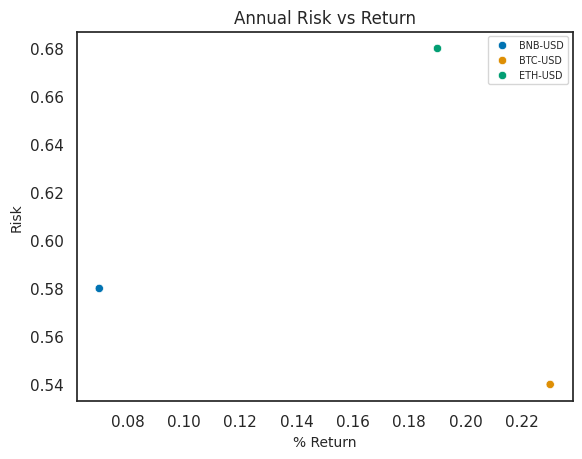

In [ ]:
sns.scatterplot(x=summary['% Return'], y=summary['Risk'], legend = True, data=summary, palette='colorblind',hue='crypto' )
plt.xlabel('% Return',fontsize=10)
plt.ylabel('Risk',fontsize=10)
plt.title('Annual Risk vs Return',fontsize=12)
plt.legend(fontsize='xx-small')
plt.show()
